In [78]:
import numpy as np
import matplotlib.pyplot
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import cm

def hypothesis(A1, A2, X1, X2):
	h = A1*X1 + A2*X2
	return h

	# Generate points for plotting the cost-function surface.
	J = np.zeros((N,N))
	for iter1 in range(0, N):
		for iter2 in range(0, N):
			a1 = A1[iter1][iter2]
			a2 = A2[iter1][iter2]
			h = hypothesis(a1, a2, X1, X2)
			J[iter1][iter2] = (1/M)*np.sum( np.square(y - h))
			
	return J, A1, A2

# function to compute gradient of error function w.r.t. theta 
def gradient(y, X, h, batch_size):
	grad = -(2/batch_size)*X.T.dot(y - h)
	return grad 

# function to create a list containing mini-batches 
def create_mini_batches(y, X1, X2, batch_size): 
	mini_batches = [] 
	randomize = np.arange(len(X1))
	np.random.shuffle(randomize)
	X1 = X1[randomize]
	X2 = X2[randomize]
	y = y[randomize] 
	n_minibatches = X1.shape[0] // batch_size
  
	for i in range(n_minibatches + 1): 
		X1_mini = X1[i * batch_size:(i + 1)*batch_size]
		X2_mini = X2[i * batch_size:(i + 1)*batch_size]
		Y_mini = y[i * batch_size:(i + 1)*batch_size] 
		mini_batches.append((X1_mini, X2_mini, Y_mini)) 
	if X1.shape[0] % batch_size != 0: 
		X1_mini = X1[i * batch_size:X1.shape[0]]
		X2_mini = X2[i * batch_size:X2.shape[0]]
		Y_mini =  y[i * batch_size:X1.shape[0]]
		mini_batches.append((X1_mini, X2_mini, Y_mini))
	return mini_batches

# function to perform mini-batch gradient descent 
def miniBatchGradientDescent(y, X_1, X_2, alpha, error_threshold, mini_batch_size, numParamsA): 
    #Create empty structures
    n_minibatches = X_1.shape[0] // mini_batch_size
    a = np.zeros((numParamsA, n_minibatches))
    Jgd = np.zeros(n_minibatches)

    for i in range(numParamsA):
        a[i, 0] = -30;
    
    mini_batches = create_mini_batches(y, X_1, X_2, mini_batch_size)
    X_1, X_2, y = mini_batches[0]
    h = hypothesis(a[0, 0], a[1, 0], X_1, X_2)
    Jgd[0] = (1/mini_batch_size)*np.sum(np.power(y - h, 2))

    error = 1
    iteration = 0
    for mini_batch_index in range(1, len(mini_batches)):
        if error > 0.001 and iteration < n_minibatches-1:
            X_1, X_2, y = mini_batches[mini_batch_index] 
            X = np.block([X_1, X_2])
            h = hypothesis(a[0, iteration], a[1, iteration], X_1, X_2)
            grad = gradient(y, X, h, mini_batch_size)
            a_aux = a[:, iteration] - alpha*grad
            a[0, iteration+1] = a_aux[0, 0]
            a[1, iteration+1] = a_aux[1, 0]
            h = hypothesis(a[0, iteration+1], a[1, iteration+1], X_1, X_2)
            Jgd[iteration+1] = (1/mini_batch_size)*np.sum(np.power(y - h, 2))
            error = np.abs(Jgd[iteration] - Jgd[iteration+1])
            iteration += 1
        else:
            break
    return Jgd, a, iteration

#------------------------------------------------------------------------------------------------------------------------------
np.random.seed(1234)
M = 10000
x1 = np.random.rand(M, 1)
x2 = np.random.rand(M, 1)
w = np.random.rand(M, 1)
y = 2.0*x1 + 2.0*x2 + w

alpha = 0.9 # learning rate
mini_batch_size = 32
maxNumIter = 1000
numParamsA = 2
tic = time()
Jgd, a, iteration = miniBatchGradientDescent(y, x1, x2, alpha, mini_batch_size, maxNumIter, numParamsA)
toc = time()

c)

Resolution time (Mini-Batch): 0.0029981136322021484 s


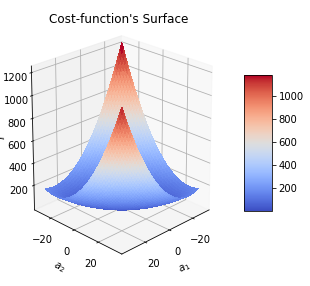

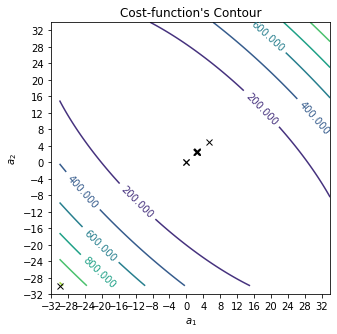

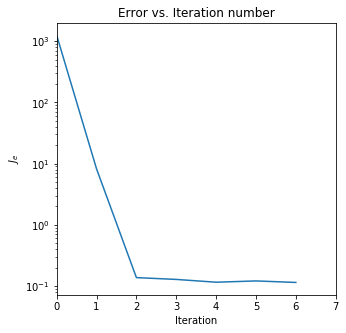

In [79]:
def calculateErrorSurface(y, X1, X2, M):
	# Generate values for parameter space.
	N = 200
	a1 = np.linspace(-30.0, 34.0, N)
	a2 = np.linspace(-30.0, 34.0, N)

	A1, A2 = np.meshgrid(a1, a2)

	# Generate points for plotting the cost-function surface.
	J = np.zeros((N,N))
	for iter1 in range(0, N):
		for iter2 in range(0, N):
			a1 = A1[iter1][iter2]
			a2 = A2[iter1][iter2]
			h = hypothesis(a1, a2, X1, X2)
			J[iter1][iter2] = (1/M)*np.sum( np.square(y - h))
			
	return J, A1, A2

def plotSurfaceError3D(J, A1, A2):
	# Plot cost-function surface.
	fig = plt.figure(figsize=(5, 5))
	ax = fig.gca(projection='3d')
	surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
	# Add a color bar which maps values to colors.
	fig.colorbar(surf, shrink=0.5, aspect=5)
	ax.set_xlabel('$a_1$')
	ax.set_ylabel('$a_2$')
	ax.set_zlabel('$J_e$');
	plt.title('Cost-function\'s Surface')
	ax.view_init(20, 45)
	fig
	#Show the plot.
	#plt.show()
    
def plotContour(J, A1, A2, a):
    fig = plt.figure(figsize=(5, 5))
    cp = plt.contour(A1, A2, J)
    plt.clabel(cp, inline=1, fontsize=10)
    plt.xlabel('$a_1$')
    plt.ylabel('$a_2$')
    plt.title('Cost-function\'s Contour')
    #plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
    plt.plot(a[0, :], a[1, :], 'kx')
    plt.xticks(np.arange(-32, 34, step=4.0))
    plt.yticks(np.arange(-32, 34, step=4.0))
    #plt.show()

def plotErrorVsIteration(Jgd, iteration):
    fig = plt.figure(figsize=(5, 5))
    plt.plot(np.arange(0, iteration), Jgd[0:iteration])
    plt.xlim((0, iteration))
    plt.yscale('log')
    plt.xlabel('Iteration')
    plt.ylabel('$J_e$')
    plt.title('Error vs. Iteration number')
    plt.show()

#-------------------------------------------------------------------------------------------------------------------------------
print('c)' + '\n')
# Calculate data point for plotting error surface.
J, A1, A2 = calculateErrorSurface(y, x1, x2, M)
plotSurfaceError3D(J, A1, A2)
print('Resolution time (Mini-Batch): ' + str(toc - tic) + ' s')
plotContour(J, A1, A2, a)
plotErrorVsIteration(Jgd, iteration)

Resolution time (Batch): 0.00499725341796875 s


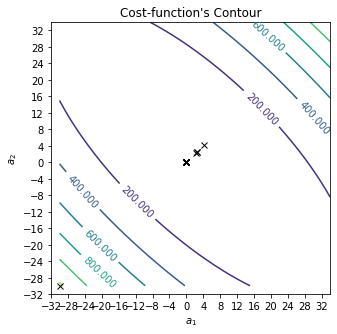

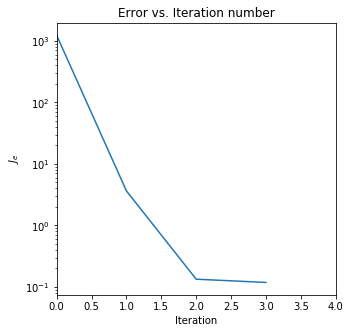




Resolution time (Online): 0.0009989738464355469 s


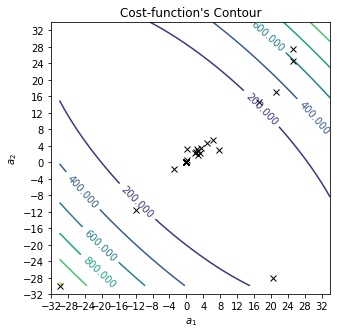

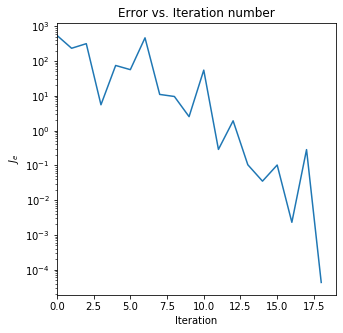

In [80]:
def BatchGradientDescent(y, X_1, X_2, alpha, error_threshold, maxNumIter, numParamsA, M):
    a = np.zeros((2, maxNumIter))
    Jgd = np.zeros(maxNumIter)
    a[0, 0] = -30;
    a[1, 0] = -30;
    h = hypothesis(a[0, 0], a[1, 0], X_1, X_2)
    Jgd[0] = (1/M)*np.sum(np.power(y - h, 2))
    
    error = 1
    iteration = 0
    X = np.block([x1, x2])
    while(error > error_threshold and iteration < maxNumIter-1):
        h = hypothesis(a[0, iteration], a[1, iteration], X_1, X_2)
        grad = gradient(y, X, h, M)
        a_aux = a[:, iteration] - alpha*grad
        a[0, iteration+1] = a_aux[0,0]
        a[1, iteration+1] = a_aux[1,0]
        h = hypothesis(a[0, iteration+1], a[1, iteration+1], X_1, X_2)
        Jgd[iteration+1] = (1/M)*np.sum(np.power(y - h, 2))
        error = np.abs(Jgd[iteration]-Jgd[iteration+1])
        iteration += 1
    return Jgd, a, iteration

def OnlineGradientDescent(y, X1, X2, alpha, error_threshold, maxNumIter, numParamsA, M):
    a = np.zeros((2, maxNumIter))
    Jgd = np.zeros(maxNumIter)
    a[0, 0] = -30
    a[1, 0] = -30
    random_index = np.random.randint(M)
    X_1 = X1[random_index:random_index+1]
    X_2 = X2[random_index:random_index+1]
    h = hypothesis(a[0, 0], a[1, 0], X_1, X_2)
    y_ = y[random_index:random_index+1]
    Jgd[0] = np.power(y_ - h, 2)
    
    error = 1
    iteration = 0
    while error > error_threshold and iteration < maxNumIter-1:
        random_index = np.random.randint(M)
        X_1 = X1[random_index:random_index+1]
        X_2 = X2[random_index:random_index+1]
        X = np.block([X_1, X_2])
        h = hypothesis(a[0, iteration], a[1, iteration], X_1, X_2)
        y_ = y[random_index:random_index+1]
        grad = gradient(y_, X, h, 1)
        a_aux = a[:, iteration] - alpha*grad
        a[0, iteration+1] = a_aux[0, 0]
        a[1, iteration+1] = a_aux[1, 0]
        h = hypothesis(a[0, iteration+1], a[1, iteration+1], X_1, X_2)
        Jgd[iteration+1] = np.power(y_ - h, 2)
        error = np.abs(Jgd[iteration] - Jgd[iteration+1])
        iteration += 1
    return Jgd, a, iteration

#-------------------------------------------------------------------------------------------------------------------------------
# Calculate data point for plotting error surface.
J, A1, A2 = calculateErrorSurface(y, x1, x2, M)
#plotSurfaceError3D(J, A1, A2)

alpha = 0.9 # learning rate
error_threshold = 0.001
numParamsA = 2

maxNumIter = 1000
tic = time()
Jgd1, a1, iteration1 = BatchGradientDescent(y, x1, x2, alpha, error_threshold, maxNumIter, numParamsA, M)
toc = time()
print('Resolution time (Batch): ' + str(toc - tic) + ' s')
plotContour(J, A1, A2, a1)
plotErrorVsIteration(Jgd1, iteration1)
print('\n\n')

alpha = 0.9 # learning rate
maxNumIter = 1000
tic = time()
Jgd2, a2, iteration2 = OnlineGradientDescent(y, x1, x2, alpha, error_threshold, maxNumIter, numParamsA, M)
toc = time()
print('Resolution time (Online): ' + str(toc - tic) + ' s')
plotContour(J, A1, A2, a2)
plotErrorVsIteration(Jgd2, iteration2)
print('\n\n')

In [ ]:
'''
e)
Com os gráficos do item anterior pude chegar as seguintes conclusões:
 .A versão online é muito menos regular, o seja, tem mudanças pronunciadas.
 .A versão online é a mais rapida e a versão batch é a mais lenta.
 .A versão batch tem um comportamento muito regular, o seja, converge diretamente ao mínimo erro.
 .A versão mini_batch possui um comportamento intermedio entre a batch e a online, mesmo em regularidad como em rapides.
'''